In [1]:
import pandas as pd 
import numpy as np
from IPython.display import display
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

PM2.5: PM2.5 concentration (ug/m^3)

PM10: PM10 concentration (ug/m^3)

SO2: SO2 concentration (ug/m^3)

NO2: NO2 concentration (ug/m^3)

CO: CO concentration (ug/m^3)

O3: O3 concentration (ug/m^3)

TEMP: temperature (degree Celsius)

PRES: pressure (hPa)

DEWP: dew point temperature (degree Celsius)

RAIN: precipitation (mm)

wd: wind direction

WSPM: wind speed (m/s)

station: name of the air-quality monitoring site

In [2]:
#getting the path for all the stored files 
path = "PRSA_Data_Huairou_20130301-20170228.csv"
allFiles = glob.glob(path)

#creating a dataframe and list to store temp dataframe
df = pd.DataFrame()
list_ = []

#combining all the CSV files into one
for file in allFiles:
   tempDF = pd.read_csv(file,index_col=None, header=0)
   list_.append(tempDF)

df = pd.concat(list_)

#cols = ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 
#        'RAIN', 'wd', 'WSPM', 'station']
#df.columns = df[cols]
df = df.sort_values(['station', 'year'])
  

In [3]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [4]:
# let's view at the statistical values for the dataset 
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


In [5]:
df.shape

(35064, 18)

The initial Data Set Contains 420768 rows and 18 coloumns 
including all the nulls in the rows

In [6]:
countOfMissing = df.isna().sum()
rowNumb = df.shape[0]
percMissingValue = {}
print(rowNumb)
# find the % of the data missing 
for i in range(countOfMissing.size): 
    colname = df.columns[i]
    keyVal = colname
    accValue = (countOfMissing[i]/rowNumb) * 100    
    percMissingValue[keyVal] = accValue
    
series = pd.Series(percMissingValue) 

print(series)

35064
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.717887
PM10       2.215948
SO2        2.794889
NO2        4.674310
CO         4.055441
O3         3.282569
TEMP       0.145448
PRES       0.151152
DEWP       0.151152
RAIN       0.156856
wd         0.861282
WSPM       0.139744
station    0.000000
dtype: float64


### Possible Solutions for Missing Values: 1- remove them, we will be only losing less than 5% of the data 2- replace with some estimation eg: mean, or from a linear regression since (this would make sense since the values at taken at an interval of 1 reading per hour, so we can find the average for that day and replace for missing values)

In [7]:
#The missing value for Wind direction has been removed as it very small
#And it doesn't make sense to replace it with a preprocessing technique 
df = df.dropna(axis=0, subset=['wd'])

#For the numerical values the null values has been filled with the previous value
#This works will till 2 steps
df = df.fillna(method='ffill', limit=2 )

In [8]:
#The remaining missing values
newMissing = df.isnull().sum()
print(newMissing)

No           0
year         0
month        0
day          0
hour         0
PM2.5      591
PM10       516
SO2        568
NO2        842
CO         775
O3         614
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           0
WSPM         0
station      0
dtype: int64


In [9]:
# fill the remaining missing values with that days mean
df= df.fillna(df.groupby(['year','month', 'day']).transform('mean'))

In [10]:
df = df.groupby(["year","month" , 'day', 'hour']).mean().reset_index().sort_values(by=['year', 'month' , 'day', 'hour'],ascending=True)

In [11]:
df.shape

(34762, 16)

### Now we want to check if the statical value changed by much 

In [12]:
df.describe()

,year,month,day,hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34498.000000,34498.000000,34498.000000,34498.000000,34450.000000,34426.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000
mean,2014.653616,6.522640,15.709683,11.512025,17453.320724,69.449089,91.602070,12.179181,32.008060,1019.195283,60.145604,12.475844,1007.577661,2.218837,0.067988,1.662839
std,1.176349,3.443707,8.804096,6.917082,10114.351200,71.285629,83.900578,19.022281,26.348786,893.689025,54.643040,11.759357,10.028730,14.067230,0.851741,1.196499
min,2013.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-34.900000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,6.000000,8691.250000,17.000000,28.000000,2.000000,12.000000,400.000000,19.000000,2.100000,999.300000,-9.700000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,12.000000,17432.500000,46.000000,69.000000,4.000000,24.000000,800.000000,49.000000,13.600000,1007.300000,2.600000,0.000000,1.300000
75%,2016.000000,10.000000,23.000000,18.000000,26213.750000,98.000000,130.000000,14.000000,45.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,23.000000,35064.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


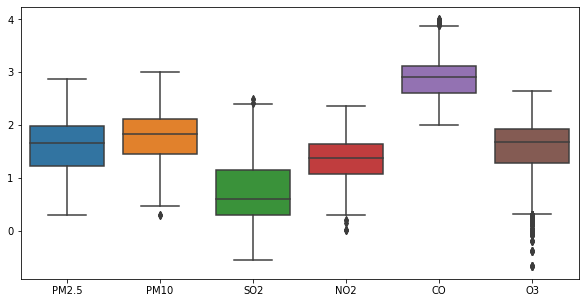

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
boxPlotDf = df.iloc[:, 5:]
boxPlotDf = boxPlotDf.iloc[:, 0:6]
ax = sns.boxplot(data=np.log10(boxPlotDf))


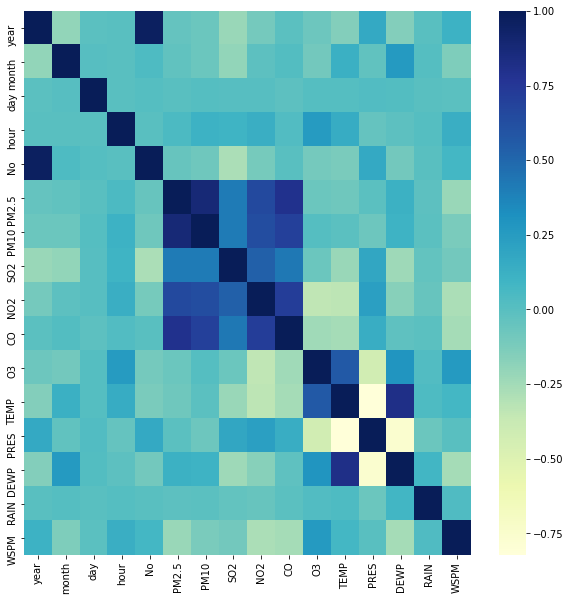

In [14]:
correlation = df.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, cmap="YlGnBu")

<h4> It is possible to observe from the box plot that thre are few outlier in the dataset and these could be removed in the future to produce more accurate models. The confusion matrix clearly shows correlation between the various chemical indicators </h4>

<h3>AQI Calculations </h3>
<h4>
To calculate AQI values accuratlely we need to perform couple of calculations to the current values we already have

<ul>


<li>SO2 - 24 hr average </li>
<li>NO2 - 24 hr average</li>
<li>CO - 24 hr average</li>
<li>O3 - 8 hr moving average</li>
<li>PM2.5 - 24 hr average</li>
<li>Pm10 - 24 hr average</li>
</ul>
Once we have all these values calculated we need to calcuale the AQI value for these independenlty and choose the Highest AQI or the Average of these as the final AQI value

</h4>

In [15]:
O3_index = df.columns.get_loc('O3')
#print(O3_index)
df['O3_8hrAvg'] = df.iloc[:,O3_index].rolling(window=8).mean().shift(1)

# no we are calculating the 24 average for the rest of the features 
considered_Columns = ['PM2.5', 'PM10' , 'SO2' , 'NO2', 'CO']
_24HrAvg = "_24HRAvg"
_8hrAvg = "_8hrAvg"

for n in considered_Columns:
    tempIndex = df.columns.get_loc(n)
    df[n + _24HrAvg] = df.iloc[:,tempIndex].rolling(window=24).mean().shift(1)

#drop the NA values for missing Moving Average Values 
df = df.dropna(axis=0,)

# we need to convert the value of CO values which are in ug/m^3 to mg/m^3 we do this by dividing by 1000

def convertCo(value):
    
    newValue = value/ 1000
    newValue = int(round(newValue))
    return newValue

In [16]:
df['CO_24HRAvg'] = df.apply(lambda x: convertCo (x['CO_24HRAvg']), axis=1)

In [17]:
# function that used to calculate the inidividual IAQI values for each chemical 


def iaqiFunction(chemicalBrakingPoints, chem24AvlList ):
  chemicalList = chemicalBrakingPoints
  tempIAQI = []
  #print(chemicalList)
  for i in chem24AvlList:
    value = i 
    if (value <= chemicalList[0]) :
        x = ((lev1[1]-lev1[0])/(chemicalList[0]-0))*(value-0) + lev1[0]
        tempIAQI.append(x)
    
    elif (value >= chemicalList[1] and value <= chemicalList[2]):
        x = ((lev2[1]-lev2[0])/(chemicalList[2]-chemicalList[1]))*(value-chemicalList[1]) + lev2[0]
        tempIAQI.append(x)
    
    elif (value >= chemicalList[3] and value <=chemicalList[4] ):
        x = ((lev3[1]-lev3[0])/(chemicalList[4]-chemicalList[3]))*(value-chemicalList[3]) + lev3[0]
        tempIAQI.append(x)
        
    elif(value >= chemicalList[5] and value <=chemicalList[6]):
        x = ((lev4[1]-lev4[0])/(chemicalList[6]-chemicalList[5]))*(value-chemicalList[5]) + lev4[0]
        tempIAQI.append(x)
        
    elif(value >= chemicalList[7] and value <= chemicalList[8] ): 
        x = ((lev5[1]-lev5[0])/(chemicalList[8]-chemicalList[7]))*(value-chemicalList[7]) + lev5[0]
        tempIAQI.append(x)
        
    elif(value >= chemicalList[9] and value <= chemicalList[10] ): 
        x = ((lev6[1]-lev6[0])/(chemicalList[10]-chemicalList[9]))*(value-chemicalList[9]) + lev6[0]
        tempIAQI.append(x)
        
    elif(value >= chemicalList[11]): 
        x = ((lev7[1]-lev7[0])/(chemicalList[12]-chemicalList[11]))*(value-chemicalList[11]) + lev7[0]
        tempIAQI.append(x)
  print(f'this is the len of the list: {len(tempIAQI)}')
  return tempIAQI


In [18]:
lev1 = [0,50] #lev1
lev2 = [51,100] #lev2
lev3 = [101, 150] #lev3
lev4 = [151, 200] #lev4
lev5 = [201 , 300] #lev5
lev6 = [301, 400] #lev6
lev7 = [401, 500] #lev6

chemicalUsedForAQI = ['PM2.5',	'PM10' ,'SO2' ,'NO2' , 'CO' , 'O3']

dictionaryBreakingPoints = {
    'chemical_PM25' : [12, 12.1, 35.4, 35.5 , 55.4, 55.5 , 150.4 , 150.5 , 250.4 , 250.5 , 350.4, 350.5, 500.4 ], 
    'chemical_PM10' : [54 , 55 , 154 , 155 , 254 , 255 , 354 , 355 , 424, 425 , 504 , 505 , 604],
    'chemical_SO2' : [50, 51, 150 , 151 , 475 , 476 , 800 , 801 , 1600 , 1601 , 2100 , 2101 , 2620],
    'chemical_NO2' : [40 , 41 , 80 , 81 , 180 , 181 , 280 , 281, 565, 566 , 750 , 751 , 940 ],
    'chemical_CO': [2 , 3 , 4 , 5, 14 , 15 , 24, 25 , 36 , 37 , 48, 49, 60] ,
    'chemical_O3': [160, 161 , 200 , 201 , 300, 301 , 400 , 401 , 800, 801 , 1000, 1001, 1200],
}

df_AQIs = pd.DataFrame()

for i in chemicalUsedForAQI:

  if i != "O3":
    temp_Chem = df[i]
    temp_MAvgChem = df[ i + _24HrAvg ].round().astype(int)
  else :
    temp_MAvgChem = df[ i + _8hrAvg].round().astype(int)


  if i == "PM2.5" :
    #print(f'this is the lenght of the 24hravg: {len(temp_MAvgChem)} , and the len of arra {len(dictionaryBreakingPoints["chemical_PM25"])}')
    #print(temp_MAvgChem[:3])
    newColName = 'IAQI_'+i
    name = 'PM25'
    lookfor= 'chemical_' + name
    df_AQIs[newColName] = iaqiFunction(dictionaryBreakingPoints[lookfor] , temp_MAvgChem)
  else:
    #print(f'this is the lenght of the 24hravg: {len(temp_MAvgChem)} , and the len of arra {len(dictionaryBreakingPoints["chemical_PM10"])}')
    #print(temp_MAvgChem[:3])
    newColName = 'IAQI_'+i
    lookfor= 'chemical_'+ str(i)
    df_AQIs[newColName] = iaqiFunction(dictionaryBreakingPoints[lookfor] , temp_MAvgChem)
  




this is the len of the list: 34250
this is the len of the list: 34250
this is the len of the list: 34250
this is the len of the list: 34250
this is the len of the list: 34250
this is the len of the list: 34250


In [19]:
df_AQIs['AQI'] = df_AQIs.max(axis =1)
df_AQIs.shape

(34250, 7)

In [20]:
df['AQI'] = df_AQIs['AQI'].to_numpy()
df['AQI'] = df.AQI.astype(float).round().astype(int)
df.head()

,year,month,day,hour,No,PM2.5,PM10,SO2,NO2,CO,...,DEWP,RAIN,WSPM,O3_8hrAvg,PM2.5_24HRAvg,PM10_24HRAvg,SO2_24HRAvg,NO2_24HRAvg,CO_24HRAvg,AQI
24,2013,3,2,0,25,15.0,21.0,44.0,28.0,500.0,...,-19.3,0.0,4.8,71.875,7.541667,12.375000,15.416667,10.666667,0,33
25,2013,3,2,1,26,9.0,16.0,28.0,17.0,400.0,...,-19.1,0.0,2.6,68.250,7.875000,12.958333,17.125000,11.750000,0,33
26,2013,3,2,2,27,11.0,13.0,40.0,16.0,300.0,...,-19.6,0.0,3.9,66.625,8.083333,13.458333,18.166667,12.375000,0,33
27,2013,3,2,3,28,8.0,15.0,27.0,17.0,400.0,...,-19.3,0.0,2.4,65.500,8.375000,13.833333,19.708333,12.958333,0,33
28,2013,3,2,4,29,13.0,15.0,47.0,26.0,400.0,...,-18.1,0.0,0.6,65.000,8.583333,14.333333,20.708333,13.583333,0,38



<h4> Now that we have the AQI values for the combines chemical it is possible catagorize them and use to run our models </h4>

In [21]:
# make a function to convert AQI values into catagorical Values 

# 0 -> AQI(0-50)
# 1 -> AQI(51-100)
# 2 -> AQI(101-150)
# 3 -> AQI(151 - 200)
# 4 -> AQI(201-300)
# 5 -> AQI(>300)


def convertAQItoCatagorical (aqiValue ) : 
    catagory =0 
    
    if (aqiValue <50) :
        catagory = 0
    
    elif (aqiValue >=51 and aqiValue <= 100):
        catagory = 1
        
    elif (aqiValue >=101 and aqiValue <= 150):
        catagory = 2
        
    elif (aqiValue >=151 and aqiValue <= 200):
        catagory = 3 
    
    elif (aqiValue >=201 and aqiValue <= 300):
        catagory = 4
        
    elif (aqiValue >300):
        catagory = 5
        
    return catagory

In [22]:
import time

In [23]:
start_time = time.time()
df['AQI'] = df.apply(lambda x: convertAQItoCatagorical(x['AQI']), axis=1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.30622291564941406 seconds ---


In [24]:
df.head()

,year,month,day,hour,No,PM2.5,PM10,SO2,NO2,CO,...,DEWP,RAIN,WSPM,O3_8hrAvg,PM2.5_24HRAvg,PM10_24HRAvg,SO2_24HRAvg,NO2_24HRAvg,CO_24HRAvg,AQI
24,2013,3,2,0,25,15.0,21.0,44.0,28.0,500.0,...,-19.3,0.0,4.8,71.875,7.541667,12.375000,15.416667,10.666667,0,0
25,2013,3,2,1,26,9.0,16.0,28.0,17.0,400.0,...,-19.1,0.0,2.6,68.250,7.875000,12.958333,17.125000,11.750000,0,0
26,2013,3,2,2,27,11.0,13.0,40.0,16.0,300.0,...,-19.6,0.0,3.9,66.625,8.083333,13.458333,18.166667,12.375000,0,0
27,2013,3,2,3,28,8.0,15.0,27.0,17.0,400.0,...,-19.3,0.0,2.4,65.500,8.375000,13.833333,19.708333,12.958333,0,0
28,2013,3,2,4,29,13.0,15.0,47.0,26.0,400.0,...,-18.1,0.0,0.6,65.000,8.583333,14.333333,20.708333,13.583333,0,0


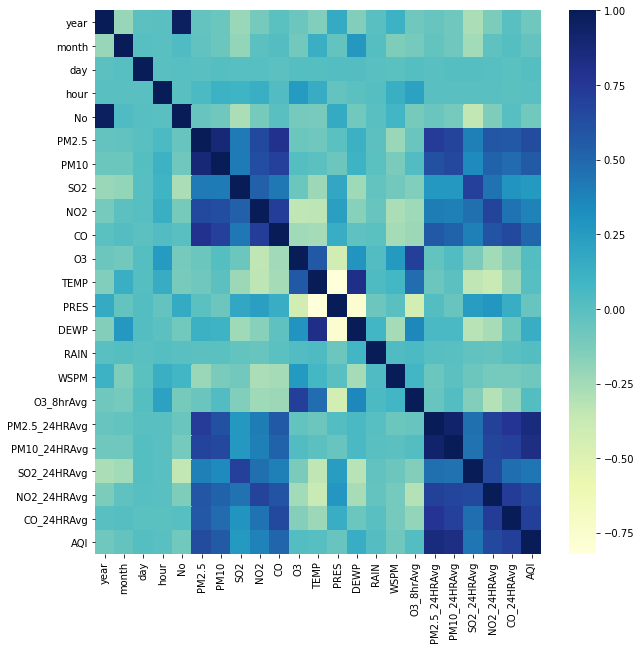

In [25]:
correlation = df.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, cmap="YlGnBu")

<h1> Model building </h1>

<h3> K-nn To predict the missing the AQI values </h1>



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [27]:
# feauture df
#X = df[['PM2.5','PM10','SO2', 'NO2', 'CO', 'O3' , 'TEMP' , 'PRES' , 'DEWP' , 'RAIN']].values
X_DF = df[['PM10','PM10_24HRAvg','O3','O3_8hrAvg','TEMP' , 'PRES' , 'DEWP' , 'RAIN']].values
#target df
#y = df[['AQI']].values
Y_DF = df[['AQI']].values

In [28]:
scaler = StandardScaler()
x_new = scaler.fit_transform(X_DF)

In [29]:
# try PCA to reduce the complexity and run time of the algorithm 
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x_new)
pca.explained_variance_ratio_

array([0.41408607, 0.20823821, 0.1323923 , 0.12310364])

In [30]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_DF, test_size=0.20) 


Hyperparameter Tuning

In [31]:

from sklearn.model_selection import cross_val_score
score = []
count = 0 
maxVal = 50
for i in range(1,50):
  classifier = KNeighborsClassifier(n_neighbors=i)
  tempScore = cross_val_score(classifier, principalComponents, Y_DF.ravel(), cv=10, scoring='accuracy')
  score.append(tempScore.mean())
  count = count + 1
  print(f'% done is {int( (count / maxVal) *100 )}')


% done is 2
% done is 4
% done is 6
% done is 8
% done is 10
% done is 12
% done is 14
% done is 16
% done is 18
% done is 20
% done is 22
% done is 24
% done is 26
% done is 28
% done is 30
% done is 32
% done is 34
% done is 36
% done is 38
% done is 40
% done is 42
% done is 44
% done is 46
% done is 48
% done is 50
% done is 52
% done is 54
% done is 56
% done is 57
% done is 60
% done is 62
% done is 64
% done is 66
% done is 68
% done is 70
% done is 72
% done is 74
% done is 76
% done is 78
% done is 80
% done is 82
% done is 84
% done is 86
% done is 88
% done is 90
% done is 92
% done is 94
% done is 96
% done is 98


Text(0, 0.5, 'Accuracy Cross-Validation')

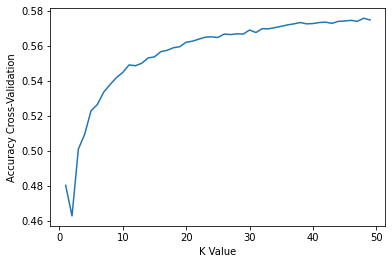

In [32]:

rangeOfKneighbour = range(1,50)
plt.plot(rangeOfKneighbour, score)
plt.xlabel('K Value')
plt.ylabel('Accuracy Cross-Validation')


In [33]:
classifier = KNeighborsClassifier(n_neighbors=20,)
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

[[ 286  294   14    9    0    0]
 [ 142 1267  163  230    0    0]
 [   6  378  311  443   15    2]
 [   2  175  190 2117  101    9]
 [   0    0    1  208  353   17]
 [   0    0    0    8   55   54]]

              precision    recall  f1-score   support

           0       0.66      0.47      0.55       603
           1       0.60      0.70      0.65      1802
           2       0.46      0.27      0.34      1155
           3       0.70      0.82      0.75      2594
           4       0.67      0.61      0.64       579
           5       0.66      0.46      0.54       117

    accuracy                           0.64      6850
   macro avg       0.62      0.56      0.58      6850
weighted avg       0.63      0.64      0.63      6850



Text(0.5, 1.0, 'Normalised Confusion Matrix for KNN')

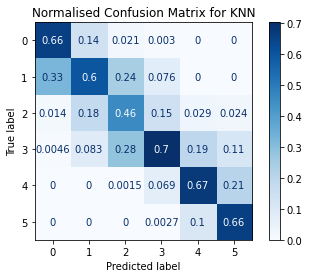

In [37]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='pred')
disp.ax_.set_title("Normalised Confusion Matrix for KNN")


<h1> Decision Trees</h1>

In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score


Hyperparameter Tuning

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_DF, test_size=0.20, random_state=0)
#X_train, X_val, y_train, y_val = train_test_split(principalComponents, Y_DF, test_size=0.0001, random_state=0)

In [ ]:

clfs_gini = []
clfs_entropy = []
import numpy as np
count = 0 
ccp_alphas = np.arange(0.001, 0.01, 0.001)
for ccp_alpha in ccp_alphas:
  clf_g = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha,criterion='gini' )
  clf_g.fit(X_train, y_train)
  clfs_gini.append(clf_g)

  clf_e = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha,criterion='entropy' )
  clf_e.fit(X_train, y_train)
  clfs_entropy.append(clf_e)
  count = count + 1
  print(f" % done { int( ((count)/len(ccp_alphas)) *100)}%")
  
#print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
#      clfs[-1].tree_.node_count, ccp_alphas[-1]))




In [ ]:

train_scores_g = [clf.score(X_train, y_train) for clf in clfs_gini]
test_scores_g = [clf.score(X_test, y_test) for clf in clfs_gini]


train_scores_e = [clf.score(X_train, y_train) for clf in clfs_entropy]
test_scores_e = [clf.score(X_test, y_test) for clf in clfs_entropy]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for testing data Gini Vs Entropy")
ax.plot(ccp_alphas, test_scores_e, marker='o', label="test_e",  drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores_g, marker='o', label="test_g",
        drawstyle="steps-post")
ax.legend()
plt.show()



As we can see from the graph the Accuracy for Decision tree using Entropy is sligtly higer than using gini. 
And the ideal parameter can be choosed as 0.001 or 0.002

In [ ]:
clf_DT = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.001,criterion='entropy' )
clf_DT.fit(X_train, y_train)

y_predDT = clf_DT.predict(X_test)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred= clf_DT.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred= y_predDT))

In [ ]:
print(confusion_matrix(y_test, y_predDT))
print("")
print(classification_report(y_test, y_predDT))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf_DT, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
disp.ax_.set_title("Normalised Confusion Matrix for Decision Tree")

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model = RandomForestClassifier(n_estimators=100,
                               criterion='entropy', 
                               random_state=0, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [ ]:
model.fit(X_train, y_train)
y_predRF = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_predRF))
print("")
print(classification_report(y_test, y_predRF))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=20,) ))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0,ccp_alpha=0.001,criterion='entropy') ))
models.append(('Reandom Forest', RandomForestClassifier(n_estimators=100,
                               criterion='entropy', 
                               random_state=0, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1) ))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10)
	cv_results = cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


In [ ]:
from matplotlib import pyplot
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Beijing Data Set')
pyplot.show()